<a href="https://colab.research.google.com/github/zinzcriz/diabetis/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import warnings
import pandas as pd
import numpy as np

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Coding files/diabetes2.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Checking for Outliers

In [8]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
90%,9.000000,167.000000,88.000000,40.000000,210.000000,41.500000,0.878600,51.000000,1.000000
95%,10.000000,181.000000,90.000000,44.000000,293.000000,44.395000,1.132850,58.000000,1.000000
99%,13.000000,196.000000,106.000000,51.330000,519.900000,50.759000,1.698330,67.000000,1.000000


In [9]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Test Train Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#Puting feature variable x
X=data.drop(['Outcome'], axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
#Putting feature variable to y
y=data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [14]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [15]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
155,7,152,88,44,0,50.0,0.337,36
150,1,136,74,50,204,37.4,0.399,24
78,0,131,0,0,0,43.2,0.270,26
9,8,125,96,0,0,0.0,0.232,54
142,2,108,52,26,63,32.5,0.318,22


In [16]:
yes=(sum(data['Outcome'])/len(data['Outcome'].index))*100
yes

34.89583333333333

We have outcome yes rate as 35%

#### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scalar=StandardScaler()
X_train[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]= scalar.fit_transform(X_train[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
155,0.986878,0.980154,0.963087,1.525719,-0.652723,2.299584,-0.365520,0.248402
150,-0.850049,0.480807,0.259990,1.904416,1.058157,0.727033,-0.178798,-0.788322
78,-1.156204,0.324761,-3.456377,-1.251393,-0.652723,1.450906,-0.567300,-0.615535
9,1.293033,0.137506,1.364856,-1.251393,-0.652723,-3.940696,-0.681743,1.803488
142,-0.543895,-0.393050,-0.844875,0.389628,-0.124363,0.115486,-0.422741,-0.961109


#### Looking at correlations

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

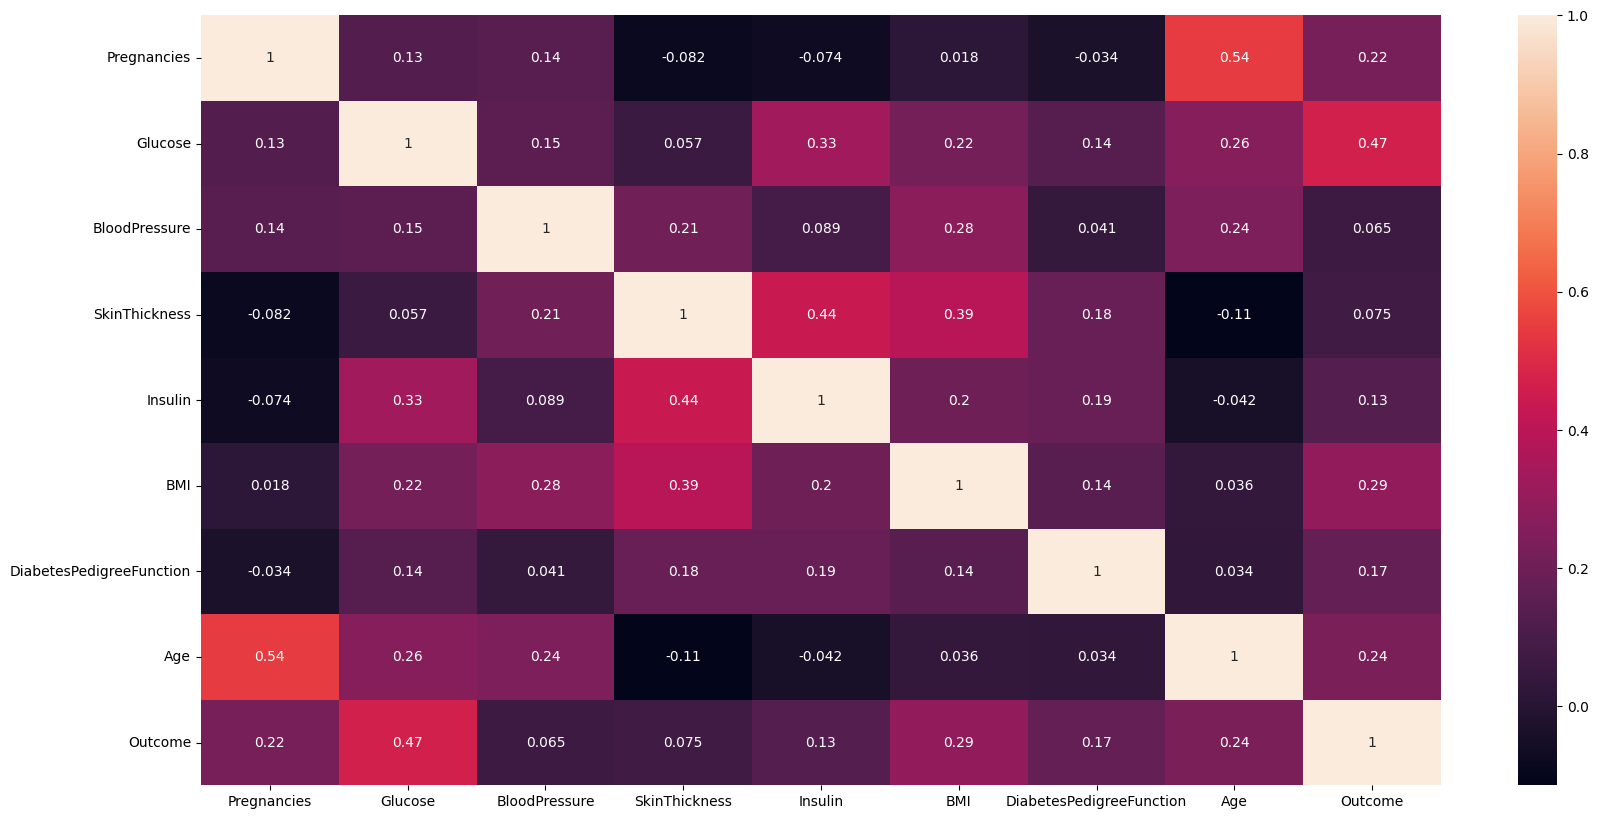

In [20]:
# Let's see the correlation matrix
plt.figure(figsize = (20,10))        # Size of the figure
f=sns.heatmap(data.corr(),annot = True)
plt.show()
fig=f.get_figure()
fig.savefig('corr.png',dpi=400)


#### Model building

In [21]:
import statsmodels.api as sm

In [22]:
logml = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                            GLM   Df Residuals:                      528
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -245.19
Date:                Sun, 16 Jul 2023   Deviance:                       490.37
Time:                        07:35:06   Pearson chi2:                     667.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3158
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.9220      0.120     -7.703      0.000      -1.157      -0.687
Pregnancies                  0.3542      0.126      2.803      0.005       0.107       0.602
Glucose                      1.1957      0.150      7.973      0.000       0.902       1.490
BloodPressure               -0.1916      0.122     -1.566      0.117      -0.431       0.048
SkinThickness               -0.0064      0.134     -0.048      0.962      -0.269       0.256
Insulin                     -0.1416      0.128     -1.103      0.270      -0.393       0.110
BMI                          0.7626      0.147      5.197      0.000       0.475       1.050
DiabetesPedigreeFunction     0.4577      0.122      3.758      0.000       0.219       0.696
Age                          0.2342      0.129      1.809      0.070      -0.020       0.488
============================================================================================
"""

#### Feature selection using RFE

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [24]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,n_features_to_select = 5)
rfe=rfe.fit(X_train,y_train)

In [25]:
rfe.support_

array([ True,  True, False, False, False,  True,  True,  True])

In [26]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Pregnancies', True, 1),
 ('Glucose', True, 1),
 ('BloodPressure', False, 2),
 ('SkinThickness', False, 4),
 ('Insulin', False, 3),
 ('BMI', True, 1),
 ('DiabetesPedigreeFunction', True, 1),
 ('Age', True, 1)]

In [27]:
col2=X_train.drop(['BloodPressure','SkinThickness','Insulin','Age'],axis=1)

In [28]:
col=col2.columns

In [29]:
col = X_train.columns[rfe.support_]

In [30]:
col

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

In [31]:
X_train[col]

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
155,0.986878,0.980154,2.299584,-0.365520,0.248402
150,-0.850049,0.480807,0.727033,-0.178798,-0.788322
78,-1.156204,0.324761,1.450906,-0.567300,-0.615535
9,1.293033,0.137506,-3.940696,-0.681743,1.803488
142,-0.543895,-0.393050,0.115486,-0.422741,-0.961109
...,...,...,...,...,...
578,1.905342,0.387180,-0.570945,-0.642592,0.248402
53,1.293033,1.729174,0.265253,0.025994,2.149062
350,0.068414,-0.892396,1.326100,-0.666685,-0.356354
79,-0.543895,-0.268213,-0.820556,-0.455869,-0.788322


In [32]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                            GLM   Df Residuals:                      531
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -247.35
Date:                Sun, 16 Jul 2023   Deviance:                       494.71
Time:                        07:35:06   Pearson chi2:                     685.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3103
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.9146      0.119     -7.696      0.000      -1.148      -0.682
Pregnancies                  0.3462      0.125      2.775      0.006       0.102       0.591
Glucose                      1.1227      0.136      8.226      0.000       0.855       1.390
BMI                          0.6881      0.133      5.159      0.000       0.427       0.949
DiabetesPedigreeFunction     0.4457      0.120      3.721      0.000       0.211       0.681
Age                          0.2159      0.126      1.707      0.088      -0.032       0.464
============================================================================================
"""

In [33]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

155    0.880847
150    0.396846
78     0.416397
9      0.050271
142    0.134635
321    0.142068
580    0.577149
75     0.001280
29     0.317344
169    0.163360
dtype: float64

#### creating dataframe with actual values vs predicted values


In [34]:
y_train_pred_final = pd.DataFrame({'Real_OC':y_train.values, 'Pred_OC':y_train_pred})
y_train_pred_final['Index'] = y_train.index
y_train_pred_final

,Real_OC,Pred_OC,Index
155,1,0.880847,155
150,0,0.396846,150
78,1,0.416397,78
9,1,0.050271,9
142,0,0.134635,142
...,...,...,...
578,0,0.390308,578
53,1,0.894012,53
350,0,0.205145,350
79,0,0.087706,79


In [35]:
y_train_pred_final['Predicted']=y_train_pred_final.Pred_OC.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Real_OC,Pred_OC,Index,Predicted
155,1,0.880847,155,1
150,0,0.396846,150,0
78,1,0.416397,78,0
9,1,0.050271,9,0
142,0,0.134635,142,0


In [36]:
from sklearn import metrics

In [37]:
confusion=metrics.confusion_matrix(y_train_pred_final.Real_OC,y_train_pred_final.Predicted)
print(confusion)

[[312  38]
 [ 75 112]]


In [38]:
print(metrics.accuracy_score(y_train_pred_final.Real_OC,y_train_pred_final.Predicted))

0.7895716945996276


#### Checking VIF values

In [39]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']= [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'] , 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
4,Age,1.44
0,Pregnancies,1.38
1,Glucose,1.12
2,BMI,1.05
3,DiabetesPedigreeFunction,1.03


Here all columns have vif value below 5.So no need of elimination.

#### Drawing ROC curve

In [41]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    print(auc_score)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

0.8503590527119937


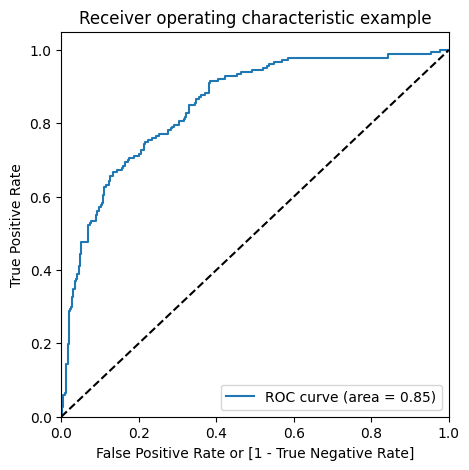

In [42]:
draw_roc(y_train_pred_final.Real_OC, y_train_pred_final.Pred_OC)

#### Finding optimal cutoff point

In [43]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Pred_OC.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Real_OC,Pred_OC,Index,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
155,1,0.880847,155,1,1,1,1,1,1,1,1,1,1,0
150,0,0.396846,150,0,1,1,1,1,0,0,0,0,0,0
78,1,0.416397,78,0,1,1,1,1,1,0,0,0,0,0
9,1,0.050271,9,0,1,0,0,0,0,0,0,0,0,0
142,0,0.134635,142,0,1,1,0,0,0,0,0,0,0,0


In [44]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Real_OC, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.348231  1.000000  0.000000
0.1   0.1  0.560521  0.978610  0.337143
0.2   0.2  0.698324  0.919786  0.580000
0.3   0.3  0.737430  0.791444  0.708571
0.4   0.4  0.782123  0.705882  0.822857
0.5   0.5  0.789572  0.598930  0.891429
0.6   0.6  0.782123  0.502674  0.931429
0.7   0.7  0.757914  0.390374  0.954286
0.8   0.8  0.731844  0.267380  0.980000
0.9   0.9  0.674115  0.085561  0.988571


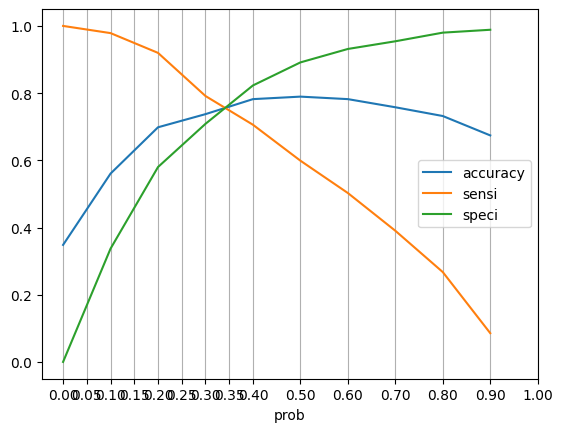

<Figure size 1000x2000 with 0 Axes>

In [45]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
x=[0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
p=cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],xticks=x)
plt.rcParams["figure.figsize"] = [10,20]
p.xaxis.grid(True, )
plt.show()

plt.savefig('a.png')

In [46]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Pred_OC.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Real_OC,Pred_OC,Index,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
155,1,0.880847,155,1,1,1,1,1,1,1,1,1,1,0,1
150,0,0.396846,150,0,1,1,1,1,0,0,0,0,0,0,1
78,1,0.416397,78,0,1,1,1,1,1,0,0,0,0,0,1
9,1,0.050271,9,0,1,0,0,0,0,0,0,0,0,0,0
142,0,0.134635,142,0,1,1,0,0,0,0,0,0,0,0,0


In [47]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Real_OC, y_train_pred_final.final_predicted)

0.7616387337057728

#### Precision and Recall

In [48]:
from sklearn.metrics import precision_score, recall_score

In [49]:
precision_score(y_train_pred_final.Real_OC, y_train_pred_final.Predicted)

0.7466666666666667

In [50]:
recall_score(y_train_pred_final.Real_OC, y_train_pred_final.Predicted)

0.5989304812834224

In [51]:
from matplotlib.pyplot import figure

In [52]:
from sklearn.metrics import precision_recall_curve

In [53]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Real_OC, y_train_pred_final.Pred_OC)

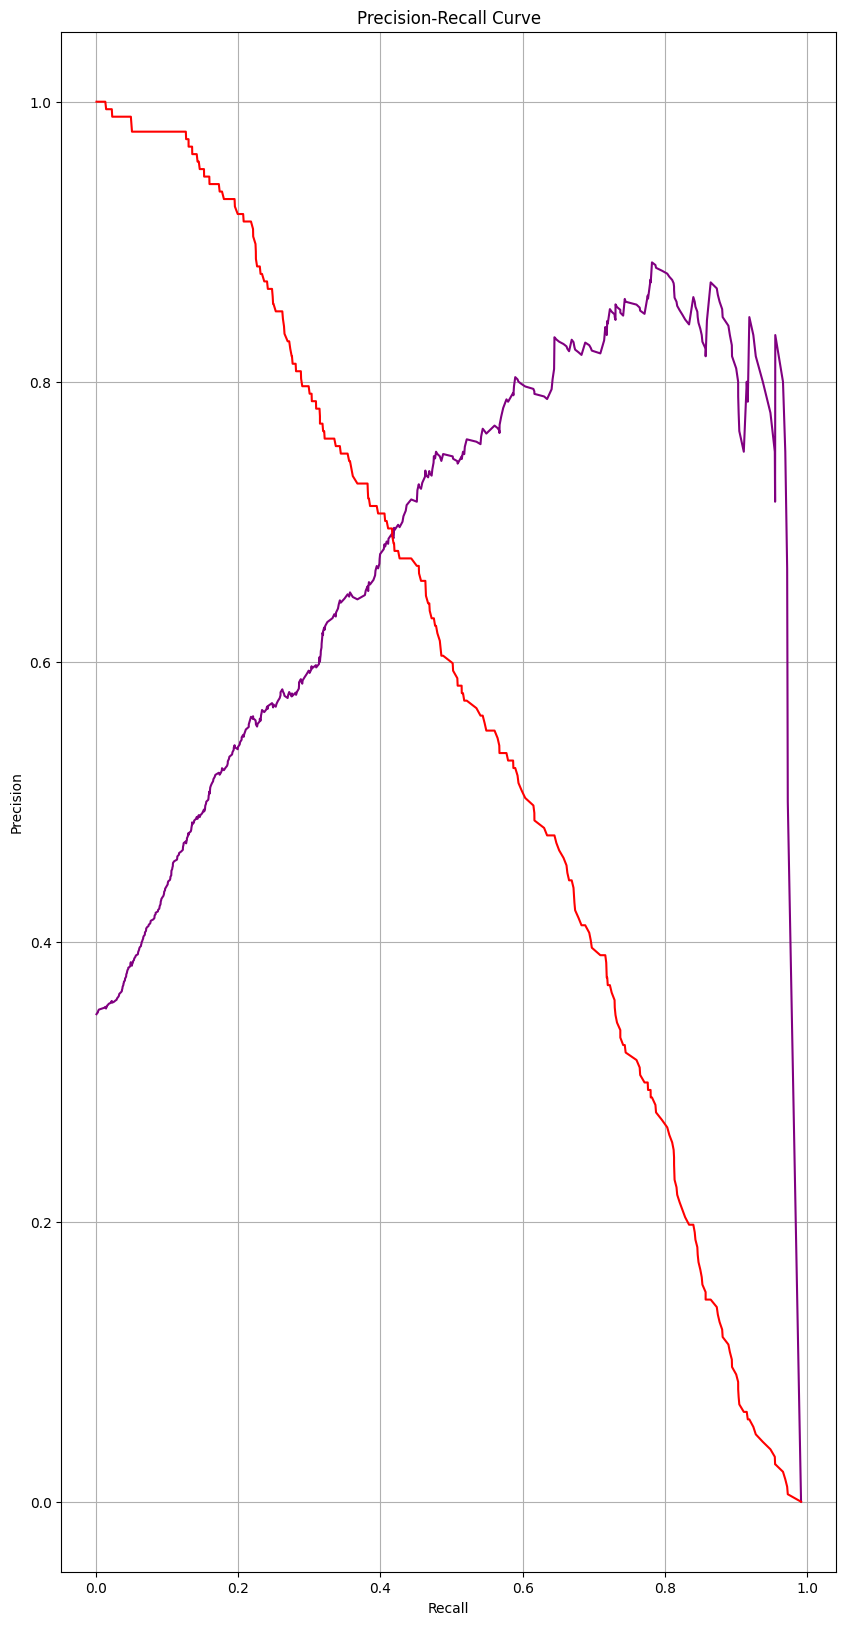

In [54]:
fig, ax = plt.subplots()
ax.plot(thresholds, p[:-1], color='purple')
ax.plot(thresholds, r[:-1], color='red')
#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.grid(True)
plt.rcParams["figure.figsize"] = (20,20)

#display plot
plt.show()

Here let's assume tradeoff is 0.42

#### Making Predictions

In [55]:
#from sklearn.preprocessing import StandardScaler

In [56]:
X_test[col]

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
173,1,79,43.5,0.678,23
253,0,86,35.8,0.238,25
207,5,162,37.7,0.151,52
737,8,65,32.0,0.600,42
191,9,123,33.1,0.374,40
...,...,...,...,...,...
259,11,155,33.3,1.353,51
512,9,91,24.2,0.200,58
111,8,155,34.0,0.543,46
548,1,164,32.8,0.341,50


In [57]:
#scaler=StandardScaler()

In [58]:
#scalar=StandardScaler()
X_test[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]= scalar.transform(X_test[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
173,-0.850049,-1.298116,-0.443106,1.399487,-0.250163,1.488347,0.661452,-0.874716
253,-1.156204,-1.079652,-0.041337,0.768325,-0.652723,0.527344,-0.663673,-0.701928
207,0.374569,1.292246,1.766626,-1.251393,-0.652723,0.764475,-0.925686,1.630700
737,1.293033,-1.735044,0.159548,0.200279,-0.652723,0.053083,0.426544,0.766764
191,1.599187,0.075088,0.059106,1.525719,0.135623,0.190369,-0.254089,0.593977


In [59]:
col

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

In [60]:
X_test=X_test[col]

In [61]:
X_test.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
173,-0.850049,-1.298116,1.488347,0.661452,-0.874716
253,-1.156204,-1.079652,0.527344,-0.663673,-0.701928
207,0.374569,1.292246,0.764475,-0.925686,1.630700
737,1.293033,-1.735044,0.053083,0.426544,0.766764
191,1.599187,0.075088,0.190369,-0.254089,0.593977


In [62]:
X_test.iloc[173].values

array([-0.85004928, -0.98602401, -0.43365874, -0.87750007, -1.04750304])

In [63]:
X_test_sm=sm.add_constant(X_test)

In [64]:
X_test_sm

,const,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
173,1.0,-0.850049,-1.298116,1.488347,0.661452,-0.874716
253,1.0,-1.156204,-1.079652,0.527344,-0.663673,-0.701928
207,1.0,0.374569,1.292246,0.764475,-0.925686,1.630700
737,1.0,1.293033,-1.735044,0.053083,0.426544,0.766764
191,1.0,1.599187,0.075088,0.190369,-0.254089,0.593977
...,...,...,...,...,...,...
259,1.0,2.211496,1.073782,0.215330,2.694315,1.544307
512,1.0,1.599187,-0.923606,-0.920401,-0.778116,2.149062
111,1.0,1.293033,1.073782,0.302694,0.254880,1.112339
548,1.0,-0.850049,1.354664,0.152928,-0.353473,1.457913


In [65]:
y_test_pred = res.predict(X_test_sm)

In [66]:
y_test_pred

173    0.177097
253    0.068405
207    0.756084
737    0.116827
191    0.467353
         ...   
259    0.939286
512    0.128505
111    0.785929
548    0.639791
680    0.012412
Length: 231, dtype: float64

In [67]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1

,0
173,0.177097
253,0.068405
207,0.756084
737,0.116827
191,0.467353
...,...
259,0.939286
512,0.128505
111,0.785929
548,0.639791


In [68]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [69]:
y_test_df

,Outcome
173,0
253,0
207,1
737,0
191,0
...,...
259,1
512,0
111,1
548,0


In [70]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [71]:
y_test_df

,Outcome,CustID
173,0,173
253,0,253
207,1,207
737,0,737
191,0,191
...,...,...
259,1,259
512,0,512
111,1,111
548,0,548


In [72]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [73]:
y_test_df

,Outcome,CustID
0,0,173
1,0,253
2,1,207
3,0,737
4,0,191
...,...,...
226,1,259
227,0,512
228,1,111
229,0,548


In [74]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [75]:
y_pred_final.head()

,Outcome,CustID,0
0,0,173,0.177097
1,0,253,0.068405
2,1,207,0.756084
3,0,737,0.116827
4,0,191,0.467353


In [76]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [77]:
y_test_df

,Outcome
173,0
253,0
207,1
737,0
191,0
...,...
259,1
512,0
111,1
548,0


In [78]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [79]:
y_test_df

,Outcome,CustID
173,0,173
253,0,253
207,1,207
737,0,737
191,0,191
...,...,...
259,1,259
512,0,512
111,1,111
548,0,548


In [80]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [81]:
y_test_df

,Outcome,CustID
0,0,173
1,0,253
2,1,207
3,0,737
4,0,191
...,...,...
226,1,259
227,0,512
228,1,111
229,0,548


In [82]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [83]:
y_pred_final.head()

,Outcome,CustID,0
0,0,173,0.177097
1,0,253,0.068405
2,1,207,0.756084
3,0,737,0.116827
4,0,191,0.467353


In [84]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'D_Prob'})

In [85]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Outcome','D_Prob'], axis='columns')

In [86]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Outcome,D_Prob
0,173,0,0.177097
1,253,0,0.068405
2,207,1,0.756084
3,737,0,0.116827
4,191,0,0.467353


Categorizing predicted values into 0s ans 1s based on precision recall score

In [87]:
y_pred_final['final_predicted'] = y_pred_final.D_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [88]:
y_pred_final

,CustID,Outcome,D_Prob,final_predicted
0,173,0,0.177097,0
1,253,0,0.068405,0
2,207,1,0.756084,1
3,737,0,0.116827,0
4,191,0,0.467353,1
...,...,...,...,...
226,259,1,0.939286,1
227,512,0,0.128505,0
228,111,1,0.785929,1
229,548,0,0.639791,1


In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Outcome, y_pred_final.final_predicted)

0.7229437229437229

In [90]:
y_pred_final

,CustID,Outcome,D_Prob,final_predicted
0,173,0,0.177097,0
1,253,0,0.068405,0
2,207,1,0.756084,1
3,737,0,0.116827,0
4,191,0,0.467353,1
...,...,...,...,...
226,259,1,0.939286,1
227,512,0,0.128505,0
228,111,1,0.785929,1
229,548,0,0.639791,1


####Pickling

In [91]:
import pickle

In [92]:
import joblib

In [93]:
pickle.dump(res, open('model.sav', 'wb'))

In [94]:
joblib.dump(scalar, 'scaler.save')

['scaler.save']

#### Using LogisticRegression Function

 Doing the same process using logistic regression

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
logreg = LogisticRegression()
logreg.fit(X_train[col], y_train)

LogisticRegression()

In [97]:
X_test

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
173,-0.850049,-1.298116,1.488347,0.661452,-0.874716
253,-1.156204,-1.079652,0.527344,-0.663673,-0.701928
207,0.374569,1.292246,0.764475,-0.925686,1.630700
737,1.293033,-1.735044,0.053083,0.426544,0.766764
191,1.599187,0.075088,0.190369,-0.254089,0.593977
...,...,...,...,...,...
259,2.211496,1.073782,0.215330,2.694315,1.544307
512,1.599187,-0.923606,-0.920401,-0.778116,2.149062
111,1.293033,1.073782,0.302694,0.254880,1.112339
548,-0.850049,1.354664,0.152928,-0.353473,1.457913


In [98]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
y_pred

Accuracy of logistic regression classifier on test set: 0.75


array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [99]:
y_p=logreg.predict([[-0.850049,-1.298116,1.488347,0.661452,-0.874716]])
y_p

array([0])

In [100]:
joblib.dump(logreg,'log.pkl')

['log.pkl']

In [101]:
scale1=StandardScaler()

In [102]:
X_train[col]

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
155,0.986878,0.980154,2.299584,-0.365520,0.248402
150,-0.850049,0.480807,0.727033,-0.178798,-0.788322
78,-1.156204,0.324761,1.450906,-0.567300,-0.615535
9,1.293033,0.137506,-3.940696,-0.681743,1.803488
142,-0.543895,-0.393050,0.115486,-0.422741,-0.961109
...,...,...,...,...,...
578,1.905342,0.387180,-0.570945,-0.642592,0.248402
53,1.293033,1.729174,0.265253,0.025994,2.149062
350,0.068414,-0.892396,1.326100,-0.666685,-0.356354
79,-0.543895,-0.268213,-0.820556,-0.455869,-0.788322


In [103]:
from sklearn.model_selection import train_test_split

In [104]:
#Puting feature variable x
X=data.drop(['Outcome'], axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [105]:
#Putting feature variable to y
y=data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [106]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [107]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
155,7,152,88,44,0,50.0,0.337,36
150,1,136,74,50,204,37.4,0.399,24
78,0,131,0,0,0,43.2,0.270,26
9,8,125,96,0,0,0.0,0.232,54
142,2,108,52,26,63,32.5,0.318,22


In [108]:
X_train[col]

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
155,7,152,50.0,0.337,36
150,1,136,37.4,0.399,24
78,0,131,43.2,0.270,26
9,8,125,0.0,0.232,54
142,2,108,32.5,0.318,22
...,...,...,...,...,...
578,10,133,27.0,0.245,36
53,8,176,33.7,0.467,58
350,4,92,42.2,0.237,29
79,2,112,25.0,0.307,24


In [109]:
X_train[col]=scale1.fit_transform(X_train[col])

In [110]:
X_train[col]

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
155,0.986878,0.980154,2.299584,-0.365520,0.248402
150,-0.850049,0.480807,0.727033,-0.178798,-0.788322
78,-1.156204,0.324761,1.450906,-0.567300,-0.615535
9,1.293033,0.137506,-3.940696,-0.681743,1.803488
142,-0.543895,-0.393050,0.115486,-0.422741,-0.961109
...,...,...,...,...,...
578,1.905342,0.387180,-0.570945,-0.642592,0.248402
53,1.293033,1.729174,0.265253,0.025994,2.149062
350,0.068414,-0.892396,1.326100,-0.666685,-0.356354
79,-0.543895,-0.268213,-0.820556,-0.455869,-0.788322


In [111]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
173,1,79,60,42,48,43.5,0.678,23
253,0,86,68,32,0,35.8,0.238,25
207,5,162,104,0,0,37.7,0.151,52
737,8,65,72,23,0,32.0,0.600,42
191,9,123,70,44,94,33.1,0.374,40
...,...,...,...,...,...,...,...,...
259,11,155,76,28,150,33.3,1.353,51
512,9,91,68,0,0,24.2,0.200,58
111,8,155,62,26,495,34.0,0.543,46
548,1,164,82,43,67,32.8,0.341,50


In [112]:
X_test[col]=scale1.transform(X_test[col])

In [113]:
X_test[col]

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
173,-0.850049,-1.298116,1.488347,0.661452,-0.874716
253,-1.156204,-1.079652,0.527344,-0.663673,-0.701928
207,0.374569,1.292246,0.764475,-0.925686,1.630700
737,1.293033,-1.735044,0.053083,0.426544,0.766764
191,1.599187,0.075088,0.190369,-0.254089,0.593977
...,...,...,...,...,...
259,2.211496,1.073782,0.215330,2.694315,1.544307
512,1.599187,-0.923606,-0.920401,-0.778116,2.149062
111,1.293033,1.073782,0.302694,0.254880,1.112339
548,-0.850049,1.354664,0.152928,-0.353473,1.457913


In [114]:
joblib.dump(scale1,'scale.save')

['scale.save']